<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/COVID_19_(Brasil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**COVID-19 (Brasil)**
Nesse notebook você encontra informações sobre casos confirmados e mortes. Para uma comparação justa, os casos foram normalizados considerando a população estimada em 2019.

**IMPORTANDO BIBLIOTECAS**

In [0]:
import numpy as np
import pandas as pd

**FUNÇÕES AUXILIARES**

In [0]:
def estado_situacao(estados, estado, situacao):
  df = estados.loc[estados.state==estado,:]
  df = df.groupby('date').sum()[situacao]
  df = df.reset_index()
  df = df.drop('date', axis=1)
  df.columns = [estado]
  return df

In [0]:
def regiao_status(regiao, estados, status):
  df = pd.DataFrame()
  for estado in regiao:
    df = pd.concat([df, estado_situacao(estados, estado, status)],axis=1)
  return df

In [0]:
def plotar_situacao(df, situacao):
  df = df.max().to_frame()
  df.reset_index(inplace=True)
  df.columns = ['UF',situacao]
  df.sort_values([situacao], inplace=True)
  df.plot.bar(x='UF',y=situacao)

**CARREGANDO DADOS**

In [0]:
br = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
estados = br.loc[br.place_type=='state',:]
estados['confirmed']=estados['confirmed']/estados['estimated_population_2019']*100
estados['deaths']=estados['deaths']/estados['estimated_population_2019']*100

**CENTRO-OESTE**

In [0]:
centro_oeste = ['DF','GO','MS','MT']

- Confirmados

In [0]:
centro_oeste_confirmados = regiao_status(centro_oeste, estados, 'confirmed')

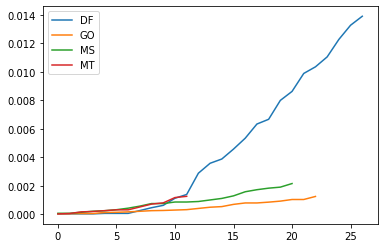

In [8]:
centro_oeste_confirmados.plot()

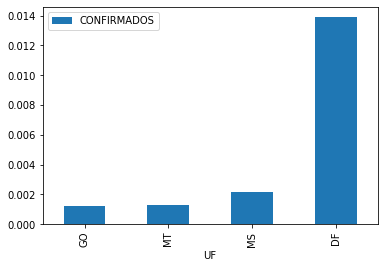

In [9]:
plotar_situacao(centro_oeste_confirmados, 'CONFIRMADOS')

- Mortes

In [0]:
centro_oeste_mortes = regiao_status(centro_oeste, estados, 'deaths')

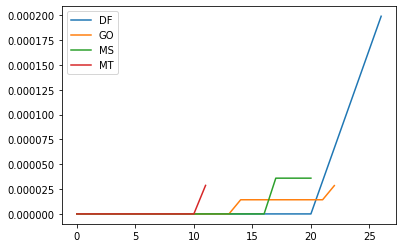

In [11]:
centro_oeste_mortes.plot()

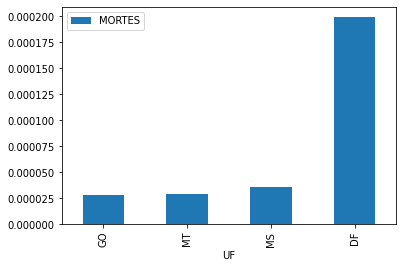

In [12]:
plotar_situacao(centro_oeste_mortes, 'MORTES')


**NORDESTE**

In [0]:
nordeste = ['AL', 'BA', 'CE', 'MA', 'PI', 'PE', 'PB', 'RN', 'SE']

- Confirmados

In [0]:
nordeste_confirmados = regiao_status(nordeste, estados, 'confirmed')

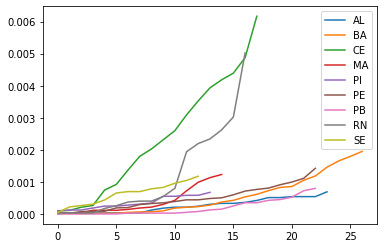

In [15]:
nordeste_confirmados.plot()

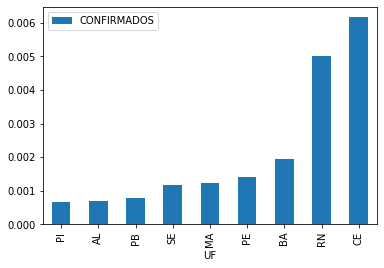

In [16]:
plotar_situacao(nordeste_confirmados, 'CONFIRMADOS')

- Mortes

In [0]:
nordeste_mortes = regiao_status(nordeste, estados, 'deaths')

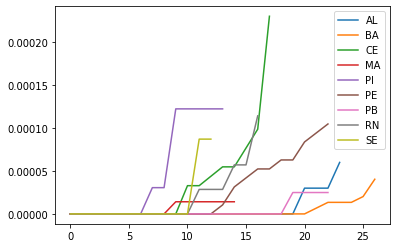

In [18]:
nordeste_mortes.plot()

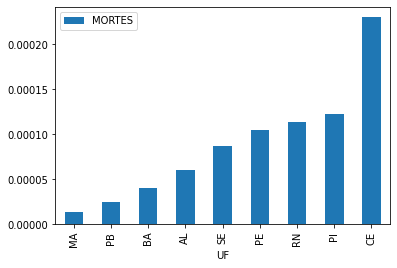

In [19]:
plotar_situacao(nordeste_mortes, 'MORTES')

**NORTE**

In [0]:
norte = ['AC','AM','AP','PA','RO','RR','TO']

- Confirmados

In [0]:
norte_confirmados = regiao_status(norte, estados, 'confirmed')

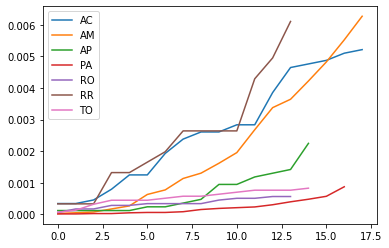

In [22]:
norte_confirmados.plot()

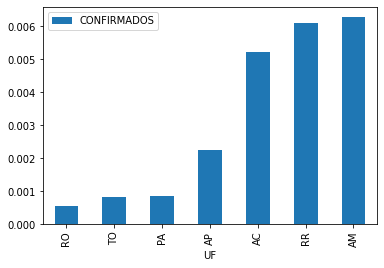

In [23]:
plotar_situacao(norte_confirmados, 'CONFIRMADOS')

- Mortes

In [0]:
norte_mortes = regiao_status(norte, estados, 'deaths')

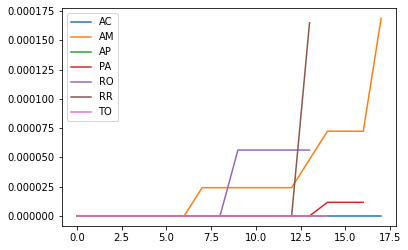

In [25]:
norte_mortes.plot()

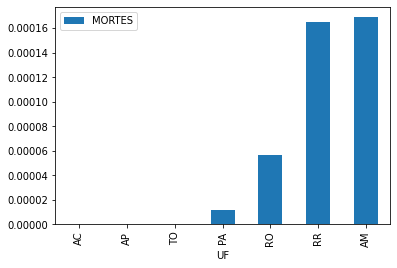

In [26]:
plotar_situacao(norte_mortes, 'MORTES')

**SUDESTE**

In [0]:
sudeste = ['ES','MG','RJ','SP']

- Confirmados

In [0]:
sudeste_confirmados = regiao_status(sudeste, estados, 'confirmed')


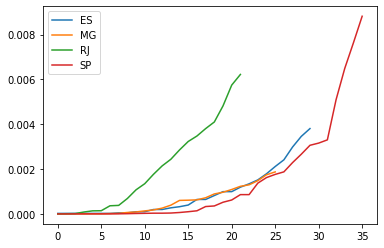

In [29]:
sudeste_confirmados.plot()

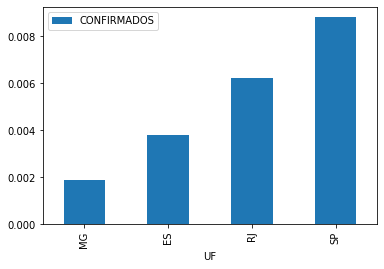

In [30]:
plotar_situacao(sudeste_confirmados, 'CONFIRMADOS')

- Mortes

In [0]:
sudeste_mortes = regiao_status(sudeste, estados, 'deaths')

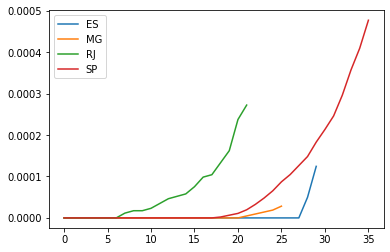

In [32]:
sudeste_mortes.plot()

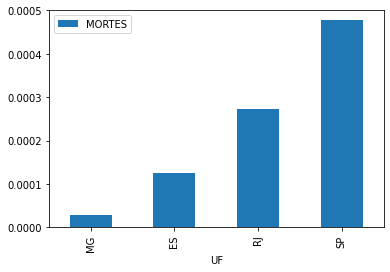

In [33]:
plotar_situacao(sudeste_mortes, 'MORTES')

**SUL**

In [0]:
sul = ['PR','RS','SC']

- Confirmados

In [0]:
sul_confirmados = regiao_status(sul, estados, 'confirmed')

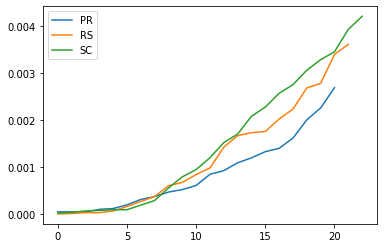

In [36]:
sul_confirmados.plot()

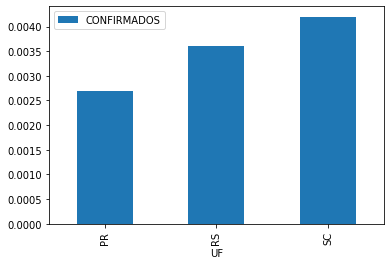

In [37]:
plotar_situacao(sul_confirmados, 'CONFIRMADOS')

- Mortes

In [0]:
sul_mortes = regiao_status(sul, estados, 'deaths')

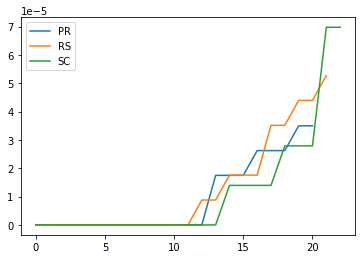

In [39]:
sul_mortes.plot()

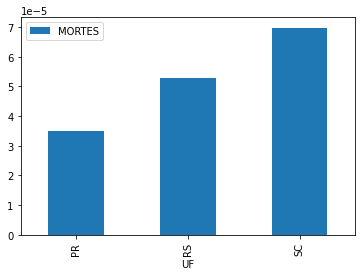

In [40]:
plotar_situacao(sul_mortes, 'MORTES')

**BRASIL**

- Confirmados

In [0]:
brasil_confirmados = pd.concat([centro_oeste_confirmados, nordeste_confirmados, 
                                norte_confirmados, sudeste_confirmados, 
                                sul_confirmados], axis=1)

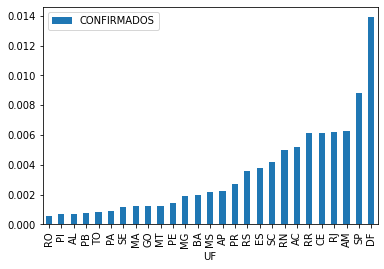

In [42]:
plotar_situacao(brasil_confirmados, 'CONFIRMADOS')

- Mortes

In [0]:
brasil_mortes = pd.concat([centro_oeste_mortes, nordeste_mortes, norte_mortes, 
                           sudeste_mortes, sul_mortes], axis=1)

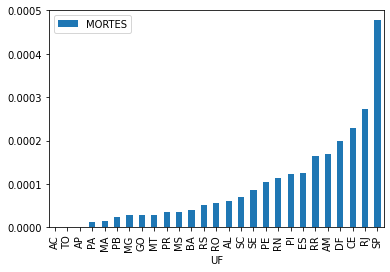

In [44]:
plotar_situacao(brasil_mortes, 'MORTES')